In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 9.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=15337ecc15d22e3e598ef5b3fc5a294e4c80900c5a8ec062cefa6d559786b37f
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np 
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib 
from matplotlib import pyplot
from pandas.plotting import lag_plot
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from pandas import concat
from scipy.stats.distributions import chi2 

In [ ]:
data = yf.download('BTC-USD','2015-1-1','2021-9-12')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,46811.128906,65210059683
2021-09-08,46827.761719,47334.054688,44561.394531,46091.390625,46091.390625,49007762488
2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,38672657013


## Preprosses the data set 

In [ ]:
for col in data.columns:
    print(col)

Open
High
Low
Close
Adj Close
Volume


In [ ]:
cols = ['Open','High','Low','Adj Close','Volume']
new_data = data.drop(cols, axis=1)
new_data

,Close
Date,
2015-01-01,314.248993
2015-01-02,315.032013
2015-01-03,281.082001
2015-01-04,264.195007
2015-01-05,274.473999
...,...
2021-09-07,46811.128906
2021-09-08,46091.390625
2021-09-09,46391.421875


In [ ]:
new_data = new_data.groupby('Date')['Close'].sum().reset_index()
new_data

,Date,Close
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001
3,2015-01-04,264.195007
4,2015-01-05,274.473999
...,...,...
2437,2021-09-07,46811.128906
2438,2021-09-08,46091.390625
2439,2021-09-09,46391.421875
2440,2021-09-10,44883.910156


In [ ]:
new_data['Date'] = pd.to_datetime(new_data['Date'], infer_datetime_format=True)

In [ ]:
df = new_data.set_index(['Date'])
type(df)

pandas.core.frame.DataFrame

In [ ]:
new_df = df['Close'].resample('D').mean()

In [ ]:
type(new_df)

pandas.core.series.Series

## Data Vizualization 

In [ ]:
new_df.describe()

count     2442.000000
mean      9248.926875
std      13237.388243
min        178.102997
25%        639.367249
50%       6112.099854
75%       9696.575684
max      63503.457031
Name: Close, dtype: float64

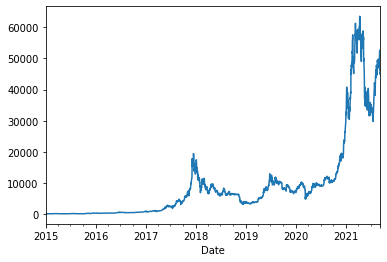

In [ ]:
new_df.plot()

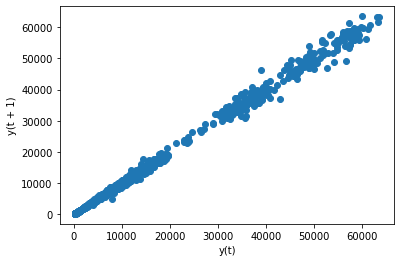

In [ ]:
lag_plot(new_df)
pyplot.show()

In [ ]:
values = DataFrame(new_df.values)
print(values)

                 0
0       314.248993
1       315.032013
2       281.082001
3       264.195007
4       274.473999
...            ...
2441  46811.128906
2442  46091.390625
2443  46391.421875
2444  44883.910156
2445  45365.398438

[2446 rows x 1 columns]


In [ ]:
p = 1
dataframe = concat([values.shift(p), values], axis=1)
print(dataframe)

                 0             0
0              NaN    314.248993
1       314.248993    315.032013
2       315.032013    281.082001
3       281.082001    264.195007
4       264.195007    274.473999
...            ...           ...
2441  52633.535156  46811.128906
2442  46811.128906  46091.390625
2443  46091.390625  46391.421875
2444  46391.421875  44883.910156
2445  44883.910156  45365.398438

[2446 rows x 2 columns]


In [ ]:
dataframe.columns = ['t-'+str(p), 't+'+str(p)]
print(dataframe)

               t-1           t+1
0              NaN    314.248993
1       314.248993    315.032013
2       315.032013    281.082001
3       281.082001    264.195007
4       264.195007    274.473999
...            ...           ...
2441  52633.535156  46811.128906
2442  46811.128906  46091.390625
2443  46091.390625  46391.421875
2444  46391.421875  44883.910156
2445  44883.910156  45365.398438

[2446 rows x 2 columns]


In [ ]:
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.998628
t+1  0.998628  1.000000


## AR model Predection

In [ ]:
new_data['Date'] = pd.to_datetime(new_data['Date'], infer_datetime_format=True)
df_ar = new_data.set_index(['Date'])
df_ar

,Close
Date,
2015-01-01,314.248993
2015-01-02,315.032013
2015-01-03,281.082001
2015-01-04,264.195007
2015-01-05,274.473999
...,...
2021-09-07,46811.128906
2021-09-08,46091.390625
2021-09-09,46391.421875


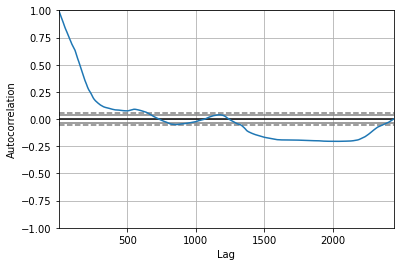

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_ar)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



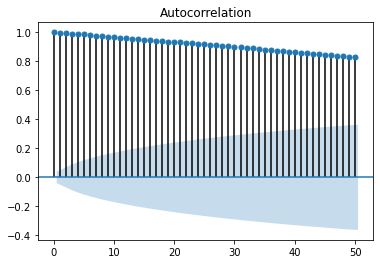

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_ar, lags=50)
pyplot.show()

## developed AR model to make predictions.

In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
test_length = 480
X = df_ar.values
train, test = X[1:len(X)-test_length], X[len(X)-test_length:]

In [ ]:
print(train.shape)
print(test.shape)

(1961, 1)
(480, 1)


In [ ]:
model = AR(train)
model_fit = model.fit()
coef = model_fit.params
window = model_fit.k_ar
print('Lag:', window)
print('Coefficients:', coef)

Lag: 25
Coefficients: [ 1.62208342e+01  1.02409722e+00 -4.20826375e-02  1.29702213e-02
  1.32730056e-03  8.23375185e-02 -1.10371125e-01 -4.33006147e-03
  6.78387404e-02 -3.71672190e-02  1.16886733e-01 -1.08154806e-01
 -2.51984575e-02 -4.16444239e-02  3.68792709e-02  1.15586144e-03
 -2.06890971e-02  1.02724870e-01 -8.40359302e-02  1.17149233e-01
 -1.75143199e-02 -1.10295675e-01  5.02755501e-02 -4.55957337e-02
 -4.03909562e-03  3.46655621e-02]


In [ ]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

In [ ]:
for t in range(len(test)):
    length = len(history) 
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=9439.521528, expected=9670.739258
predicted=9755.192239, expected=9726.575195
predicted=9731.290182, expected=9729.038086
predicted=9473.930643, expected=9522.981445
predicted=9530.276187, expected=9081.761719
predicted=9108.971802, expected=9182.577148
predicted=9225.832119, expected=9209.287109
predicted=9330.409384, expected=8790.368164
predicted=8725.684451, expected=8906.934570
predicted=8946.077854, expected=8835.052734
predicted=8848.080424, expected=9181.017578
predicted=9147.104128, expected=9525.750977
predicted=9359.864211, expected=9439.124023
predicted=9313.972928, expected=9700.414062
predicted=9685.082244, expected=9461.058594
predicted=9481.541467, expected=10167.268555
predicted=10328.654117, expected=9529.803711
predicted=9473.788148, expected=9656.717773
predicted=9661.134585, expected=9800.636719
predicted=9823.864881, expected=9665.533203
predicted=9756.197280, expected=9653.679688
predicted=9599.772027, expected=9758.852539
predicted=9755.693546, expecte

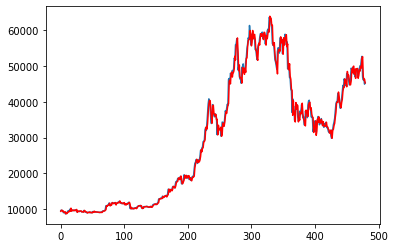

In [ ]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
from sklearn.metrics import r2_score
r_squre = r2_score(test, predictions)
print("r2_score:", r_squre)

r2_score: 0.992844297954233


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, predictions)
print('MAE: %f' % mae)

MAE: 924.740301


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1480.577786


In [ ]:
errors = abs(test - predictions)
mape = 100 * (errors / test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.21 %.
